# Random Forest Classifier _ Last Version


# Group Six - Part 2

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as pl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz

In [2]:
data = pd.read_csv("Group_6_data_cleaned (1).csv")
df = pd.DataFrame(data)



In [3]:
df.shape

(1353, 11)

In [4]:
#Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         1353 non-null   int64
 1   SFH                1353 non-null   int64
 2   popUpWidnow        1353 non-null   int64
 3   SSLfinal_State     1353 non-null   int64
 4   Request_URL        1353 non-null   int64
 5   URL_of_Anchor      1353 non-null   int64
 6   web_traffic        1353 non-null   int64
 7   URL_Length         1353 non-null   int64
 8   age_of_domain      1353 non-null   int64
 9   having_IP_Address  1353 non-null   int64
 10  Result             1353 non-null   int64
dtypes: int64(11)
memory usage: 116.4 KB


In [5]:
df.isnull().sum()

Unnamed: 0           0
SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64

In [6]:
#Split the data into training and testing sets using the train_test_split() function from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)


In [7]:
X_train.shape, X_test.shape

((947, 10), (406, 10))

In [8]:
# check data types in X_train

X_train.dtypes

Unnamed: 0           int64
SFH                  int64
popUpWidnow          int64
SSLfinal_State       int64
Request_URL          int64
URL_of_Anchor        int64
web_traffic          int64
URL_Length           int64
age_of_domain        int64
having_IP_Address    int64
dtype: object

In [9]:
X_train.head()

,Unnamed: 0,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
782,782,1,-1,1,1,0,1,1,-1,0
12,12,1,-1,0,-1,1,0,1,1,0
1213,1213,1,0,1,1,1,0,1,1,0
171,171,-1,0,-1,-1,1,1,0,-1,0
598,598,1,0,1,0,-1,0,0,-1,0


# Important features with Random Forest model 

In [10]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [11]:
#  feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores


SFH                  0.316327
Unnamed: 0           0.140519
SSLfinal_State       0.131933
popUpWidnow          0.115001
Request_URL          0.083062
URL_of_Anchor        0.069412
URL_Length           0.061967
web_traffic          0.045864
age_of_domain        0.026578
having_IP_Address    0.009337
dtype: float64

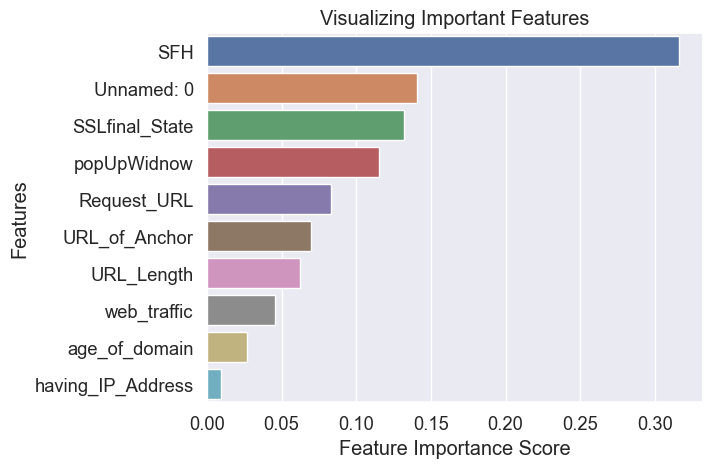

In [23]:
# Creating  

sns.barplot(x=feature_scores, y=feature_scores.index)



#  labels 

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



#  title 

plt.title("Visualizing Important Features")



# Visualize 

plt.show()

# Random Forest Classifier model with parameter n_estimators

In [24]:
X = df.drop(['Result'], axis=1)

y = df['Result']

In [25]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [26]:
# classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

model = clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score : {0:0.5f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.88143


In [27]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[204   3  21]
 [  3  26   6]
 [ 19   1 164]]


[[204   3  21]
 [  3  26   6]
 [ 19   1 164]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

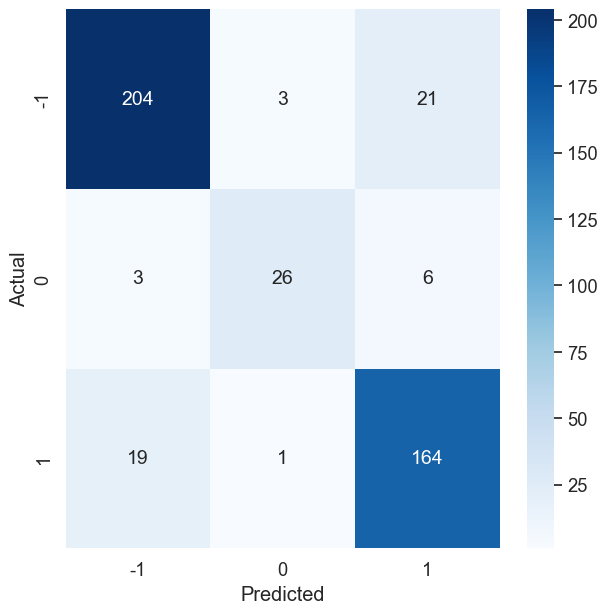

In [28]:
#array = print(confusion_matrix(y_test, predictions_test))
labels = ['Positives','Negatives']
cm = confusion_matrix(y_test, y_pred)
print(cm)

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'


plt.figure(figsize = (7,7))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt = 'g',annot_kws={"size": 14})# font size


In [29]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


C:\Users\audre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


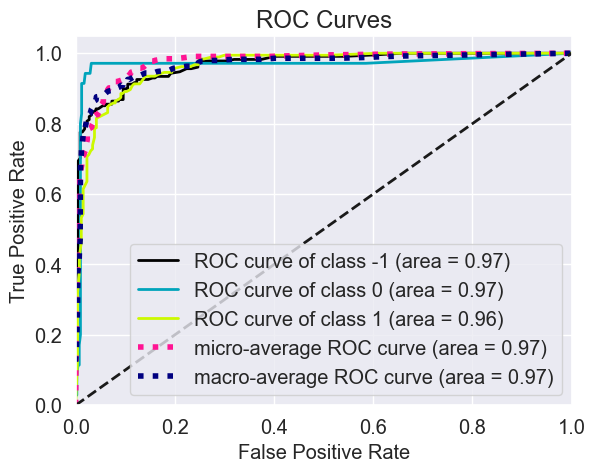

In [30]:

import sklearn.metrics as metrics
import scikitplot as skplt
import matplotlib.pyplot as plt

#y_true = # ground truth labels
y_probas =  model.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.90      0.89      0.90       228
           0       0.87      0.74      0.80        35
           1       0.86      0.89      0.87       184

    accuracy                           0.88       447
   macro avg       0.88      0.84      0.86       447
weighted avg       0.88      0.88      0.88       447

